<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_4_VSI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto 4: Integración Dinámica**

##0. Se cargan las librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Se cargan y se organizan las bases de datos

In [ ]:
nxl = "/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/4. DB_Fintechs (USD).xlsx"

def cargar_y_procesar_datos(XDB, x):
  XDB = pd.read_excel(nxl, sheet_name= x)
  XDB = XDB.iloc[:,[1,10, 11, 25]] #Incluimos solo las calumnas que necesitamos (Edad, Ingresos, Egresos, Monto (EAD))
  XDB = XDB.dropna()

  return XDB

###1.1. Datos Originales (Fintech Base)

In [ ]:
XDBo = cargar_y_procesar_datos(nxl, 0)
XDBo.head(5)

,Edad,Ingresos,Egresos,Monto (EAD)
0,33,496.87275,550.117556,250.209001
1,61,518.90575,240.179333,574.469987
2,29,1305.97300,769.749778,1469.739871
3,39,194.06275,188.418222,76.842043
4,38,883.16350,1059.917333,440.780558


###1.2. Fintech Ext 1

In [ ]:
XDBe1 = cargar_y_procesar_datos(nxl, 1)
XDBe1.head(5)

,Edad,Ingresos,Egresos,Monto (EAD)
0,73,153.20550,195.844222,84.871944
1,31,105.00425,93.578222,106.112376
2,37,185.24475,167.963778,137.737842
3,57,609.92800,559.075556,315.196041
4,31,344.88900,290.041556,256.987902


###1.3. Fintech Ext 2

In [ ]:
XDBe2 = cargar_y_procesar_datos(nxl, 2)
XDBe2.head(5)

,Edad,Ingresos,Egresos,Monto (EAD)
0,24,929.57975,996.479556,545.193466
1,53,178.29025,145.511111,116.989171
2,37,613.52050,415.619556,673.152608
3,50,1167.62800,1070.444889,1106.561066
4,32,1350.33750,1281.001778,544.182398


###1.4. Fintech Ext 3

In [ ]:
XDBe3 = cargar_y_procesar_datos(nxl, 3)
XDBe3.head(5)

,Edad,Ingresos,Egresos,Monto (EAD)
0,47,562.66000,380.999333,490.409628
1,42,806.36650,359.774444,974.824904
2,26,711.37025,700.833111,462.887434
3,50,2271.35575,2601.199111,1177.188187
4,26,361.71000,470.925111,244.151411


##2. Clusterización Estática - K Means

In [ ]:
#Fijamos la semilla:
np.random.seed(22)

In [ ]:
#1. Se crean las semillas iniciales
def semillas_iniciales(XDB):

    #Aseguramos que XDB sea un array de NumPy
    XDB = np.array(XDB)

    #Valores máximos y mínimos de cada columna
    XDBM = np.max(XDB, axis=0) #Máximos
    XDBm = np.min(XDB, axis=0) #Mínimos

    #Inicialización de la matriz de semillas
    XC = np.zeros((5,4))

    #Generación de semillas aleatorias dentro del rango de cada columna
    for i in range(5): #Número de motoncitos (clústers)
      for j in range(4): #Cada montoncito va a tener 4 variables
        XC[i,j] = np.random.uniform(XDBm[j],XDBM[j])

    return XC.astype(int)  #Mostrarlo como números enteros

###*2.1. Semillas Iniciales*

In [ ]:
#Datos Originales
sio = semillas_iniciales(XDBo)
print("Las semillas iniciales de los datos originales son: \n", sio)

Las semillas iniciales de los datos originales son: 
 [[  31 1202 1321 3020]
 [  29  846  850 2429]
 [  32 2025   34 1973]
 [  63 1858  595   22]
 [  61 2389 2205 1046]]


In [ ]:
#Datos Fintech Ext 1
sie1 = semillas_iniciales(XDBe1)
print("Las semillas iniciales de los datos Fintech Ext 1 son:  \n", sie1)

Las semillas iniciales de los datos Fintech Ext 1 son:  
 [[  60 1867 1168 2507]
 [  43 1585 2119  457]
 [  69 2682 2043 3240]
 [  22  483 2638 3036]
 [  47  349 1461 2102]]


In [ ]:
#Datos Fintech Ext 2
sie2 = semillas_iniciales(XDBe2)
print("Las semillas iniciales de los datos Fintech Ext 2 son:  \n", sie2)

Las semillas iniciales de los datos Fintech Ext 2 son:  
 [[  37  113 1298  310]
 [  23 1687 2519  405]
 [  27 1166  586 2523]
 [  52 1093 2913 2289]
 [  32  413 1598 1012]]


In [ ]:
#Datos Fintech Ext 3
sie3 = semillas_iniciales(XDBe3)
print("Las semillas iniciales de los datos Fintech Ext 3 son: \n", sie3)

Las semillas iniciales de los datos Fintech Ext 3 son: 
 [[  68  261  924  786]
 [  59 2481 2185  637]
 [  65   19 1051 3416]
 [  69   72 1975  589]
 [  50  727  466 1805]]


###*2.2. Clasificación de los Datos por Clúster*

In [ ]:
def clasificacion_clusters(XDB, si):
    #Aseguramos que XDB sea un array de NumPy
    XDB = np.array(XDB)

    #Clústers Después
    XCd= np.zeros((5,4))
    ND = np.zeros((5,1))

    #Clasificación de datos
    for k in range(len(XDB)):
        #Distancia de un registro a cada clúster
        d = np.sum(np.abs(si[:, :] - XDB[k, :]), axis=1)
        #Número de clúster al que pertenece el dato actual
        fila = np.argmin(d)

        XCd[fila,]=XCd[fila,]+XDB[k,:] #Voy sumando la información de las variables a los clústers
        ND[fila,]= ND[fila,]+1 #Cuento el número de datos que quedaron por clúster

    #Promedios
    XCd = XCd/ND #Ahora dividimos todos las variables por el número de clústers

    return XCd, ND

In [ ]:
#Datos Originales
XCdo, clasificacion_o = clasificacion_clusters(XDBo, sio)
print("El número de datos originales por clúster es: \n", clasificacion_o)

#Creamos un DataFrame para mostar los promedios
dfpromedio_o= pd.DataFrame((XCdo.astype(float)))
dfpromedio_o.columns=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']
dfpromedio_o.head(5)

El número de datos originales por clúster es: 
 [[   8.]
 [ 175.]
 [  16.]
 [1188.]
 [ 113.]]


,Edad,Ingresos,Egresos,Monto (EAD)
0,38.375000,1669.852156,1150.626167,2060.151012
1,39.817143,1047.964731,660.991119,1191.864738
2,39.187500,1919.053766,1121.261653,1865.113540
3,41.365320,578.353885,523.702838,380.367551
4,40.646018,1744.705823,1840.194710,1016.338575


In [ ]:
#Correlación entre las variables
dfcor= pd.DataFrame((XDBo)).corr()
dfcor.head()

,Edad,Ingresos,Egresos,Monto (EAD)
Edad,1.000000,-0.033098,-0.037194,-0.039985
Ingresos,-0.033098,1.000000,0.888146,0.818815
Egresos,-0.037194,0.888146,1.000000,0.522718
Monto (EAD),-0.039985,0.818815,0.522718,1.000000


<Axes: >

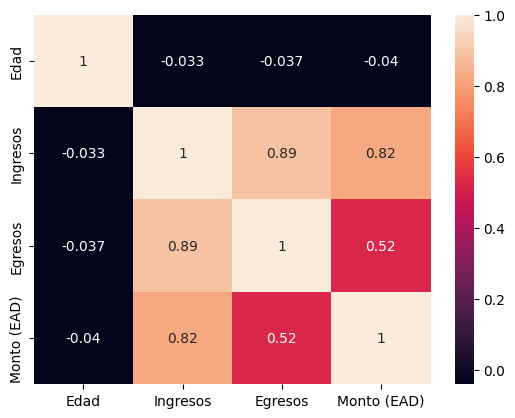

In [ ]:
#Mapa de calor - Correlación (Visual)
sns.heatmap(dfcor, annot=True)

In [ ]:
#Datos Fintech Ext 1
XCde1, clasificacion_e1 = clasificacion_clusters(XDBe1, sie1)
print("El número de datos Fintech Ext 1 por clúster es: \n", clasificacion_e1)

#Creamos un DataFrame para mostar los promedios
dfpromedio_e1= pd.DataFrame((XCde1.astype(float)))
dfpromedio_e1.columns=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']
dfpromedio_e1.head(5)

El número de datos Fintech Ext 1 por clúster es: 
 [[ 69.]
 [716.]
 [  4.]
 [  0.]
 [712.]]


,Edad,Ingresos,Egresos,Monto (EAD)
0,40.391304,1565.712399,963.034064,1671.149684
1,41.187151,968.587270,974.046940,569.966046
2,51.500000,2510.970500,2036.411444,2773.363564
3,NaN,NaN,NaN,NaN
4,40.273876,342.426166,261.890766,320.503388


El promedio de la fila 3 del DataFrame da NaN, puesto que para los datos de la Fintech 1 no hubo ningún dato en el clúster 3.

In [ ]:
#Datos Fintech Ext 2
XCde2, clasificacion_e2 = clasificacion_clusters(XDBe2, sie2)
print("El número de datos Fintech Ext 2 por clúster es: \n", clasificacion_e2)

#Creamos un DataFrame para mostar los promedios
dfpromedio_e2= pd.DataFrame((XCde2.astype(float)))
dfpromedio_e2.columns=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']
dfpromedio_e2.head(5)

El número de datos Fintech Ext 2 por clúster es: 
 [[1.022e+03]
 [6.300e+01]
 [9.900e+01]
 [1.000e+00]
 [3.150e+02]]


,Edad,Ingresos,Egresos,Monto (EAD)
0,40.860078,482.799696,471.386690,295.699155
1,41.269841,1853.321163,2093.978642,962.977389
2,42.121212,1362.951192,762.152694,1600.851823
3,31.000000,2416.498750,1753.074444,2127.994480
4,41.187302,1119.792962,931.272835,887.813200


In [ ]:
#Datos Fintech Ext 3
XCde3, clasificacion_e3 = clasificacion_clusters(XDBe3, sie3)
print("El número de datos Fintech Ext 3 por clúster es: \n", clasificacion_e3)

#Creamos un DataFrame para mostrar los promedios
dfpromedio_e3= pd.DataFrame((XCde3.astype(float)))
dfpromedio_e3.columns=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']
dfpromedio_e3.head(5)

El número de datos Fintech Ext 3 por clúster es: 
 [[1.105e+03]
 [8.900e+01]
 [1.000e+00]
 [2.000e+01]
 [1.270e+02]]


,Edad,Ingresos,Egresos,Monto (EAD)
0,41.491403,578.709177,529.292382,394.644844
1,41.471910,1842.713447,1869.200617,1089.149662
2,31.000000,2216.160750,1026.724444,3584.704542
3,39.900000,1291.291350,1622.515511,551.651402
4,40.322835,1167.562380,659.985010,1372.498260


##3. Integración Dinámica - K Medoids

In [ ]:
def integracion_dinamica(XDBe):
    #Aseguramos que XDB sea un array de NumPy
    XDBe = np.array(XDBe)

    XCe = np.copy(XCdo) #Clúster estático o inicial de los datos originales

    #Número de datos que se integraron por clúster
    NDe = np.zeros((5,1))

    nf= np.zeros((len(XDBe),1)) #Saber la fila de integración o clúster de recepción

    #Distancia
    for k in range (len(XDBe)):
      de = np.sqrt(np.sum((XCe[:,:]-XDBe[k,:])**2,axis=1)) #Distancia de un dato externo a los clústers internos
      fila=np.argmin(de)
      nf[k,]=fila

      XCe[fila,]= (XCe[fila,]+XDBe[k,:])/2 #Voy sumando la información de las variables a los clústers

      NDe[fila,]= NDe[fila,]+1 #Cuento el número de datos que quedaron por clúster

    return XCe, NDe, nf

In [ ]:
#Fintech Ext 1
XCe1, NDe1, nf1 = integracion_dinamica(XDBe1)
print("El número de datos de la Fintech Ext 1 integrados por clúster es: \n", NDe1)

El número de datos de la Fintech Ext 1 integrados por clúster es: 
 [[113.]
 [466.]
 [232.]
 [591.]
 [ 99.]]


In [ ]:
#Fintech 2
XCe2, NDe2, nf2 = integracion_dinamica(XDBe2)
print("El número de datos de la Fintech Ext 2 integrados por clúster es: \n", NDe2)

El número de datos de la Fintech Ext 2 integrados por clúster es: 
 [[395.]
 [172.]
 [285.]
 [502.]
 [146.]]


In [ ]:
#Fintech 3
XCe3, NDe3, nf3 = integracion_dinamica(XDBe3)
print("El número de datos de la Fintech Ext 3 integrados por clúster es: \n", NDe3)

El número de datos de la Fintech Ext 3 integrados por clúster es: 
 [[279.]
 [128.]
 [ 45.]
 [600.]
 [290.]]


###*3.1. Estructuras de los Clústers Antes y Después*

**Antes**

In [ ]:
print("Estructura de los Clústers Antes")
dfpromedio_o.head(5)

Estructura de los Clústers Antes


,Edad,Ingresos,Egresos,Monto (EAD)
0,38.375000,1669.852156,1150.626167,2060.151012
1,39.817143,1047.964731,660.991119,1191.864738
2,39.187500,1919.053766,1121.261653,1865.113540
3,41.365320,578.353885,523.702838,380.367551
4,40.646018,1744.705823,1840.194710,1016.338575


**Después**

In [ ]:
#Fintech Ext 1
print("Estructura de los Clústers Después (Fintech 1)")
dfd1= pd.DataFrame((XCe1.astype(float)))
dfd1.columns=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']
dfd1.head(5)

Estructura de los Clústers Después (Fintech 1)


,Edad,Ingresos,Egresos,Monto (EAD)
0,48.812462,1817.979170,928.699984,2669.071993
1,46.407853,1212.232675,721.627206,1578.257527
2,31.718732,1079.250088,907.843953,726.503718
3,42.747108,231.627334,235.209577,134.707855
4,39.404900,2045.730927,2321.892211,1065.205838


In [ ]:
#Fintech Ext 2
print("Estructura de los Clústers Después (Fintech 2)")
dfd2= pd.DataFrame((XCe2.astype(float)))
dfd2.columns=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']
dfd2.head(5)

Estructura de los Clústers Después (Fintech 2)


,Edad,Ingresos,Egresos,Monto (EAD)
0,43.069963,201.151828,155.122095,195.292452
1,36.155829,1891.145045,1992.731772,1085.650252
2,43.534835,1604.103237,868.245778,2353.786509
3,33.074653,740.355358,806.333898,465.304359
4,28.497881,1357.987255,1261.832265,861.020109


In [ ]:
#Fintech Ext 3
print("Estructura de los Clústers Después (Fintech 3)")
dfd3= pd.DataFrame((XCe3.astype(float)))
dfd3.columns=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']
dfd3.head(5)

Estructura de los Clústers Después (Fintech 3)


,Edad,Ingresos,Egresos,Monto (EAD)
0,38.252837,1099.184683,568.000873,1307.052336
1,30.869978,1429.357704,1284.901542,778.417710
2,54.543038,1915.567954,1610.841413,1696.553612
3,40.759753,255.944668,194.571523,240.318859
4,48.715781,892.656049,624.376553,590.965743


###*3.2. Cambios Porcentuales*

In [ ]:
#Fintech Ext 1
print("Los cambios porcentuales de la Fintech Ext 1 fueron:\n", (XCdo-XCe1)/XCe1)

Los cambios porcentuales de la Fintech Ext 1 fueron:
 [[-0.21382781 -0.08147894  0.23896434 -0.22813959]
 [-0.14201714 -0.13550859 -0.08402689 -0.2448224 ]
 [ 0.23546867  0.77813631  0.23508192  1.56724569]
 [-0.03232472  1.49691551  1.22653705  1.8236479 ]
 [ 0.03149653 -0.14714795 -0.20745903 -0.04587589]]


In [ ]:
#Fintech Ext 2
print("Los cambios porcentuales de la Fintech Ext 2 fueron:\n ",  (XCdo-XCe2)/XCe2)

Los cambios porcentuales de la Fintech Ext 2 fueron:
  [[-0.10900782  7.30145154  6.41755174  9.54905602]
 [ 0.10126483 -0.44585703 -0.668299    0.0978349 ]
 [-0.09985876  0.19634056  0.29141043 -0.20761142]
 [ 0.25066528 -0.21881583 -0.35051368 -0.18254032]
 [ 0.42628209  0.28477334  0.45835129  0.1803889 ]]


In [ ]:
#Fintech Ext 3
print("Los cambios porcentuales de la Fintech Ext 3 fueron: \n", (XCdo-XCe3)/XCe3)

Los cambios porcentuales de la Fintech Ext 3 fueron: 
 [[ 3.19356208e-03  5.19173422e-01  1.02574718e+00  5.76180965e-01]
 [ 2.89833866e-01 -2.66828220e-01 -4.85570608e-01  5.31137747e-01]
 [-2.81530669e-01  1.81972758e-03 -3.03927970e-01  9.93543184e-02]
 [ 1.48569714e-02  1.25968327e+00  1.69156982e+00  5.82761970e-01]
 [-1.65649877e-01  9.54510726e-01  1.94725146e+00  7.19792709e-01]]


##4. Informe de Integración

In [ ]:
def crear_informe_integracion(XDBe, nf, nombre_fintech):
  #Crear una copia del DataFrame de la Fintech externa
  informe = XDBe.copy()

  #Agregar la columna 'Clúster' al DataFrame
  informe['Clúster'] = nf.astype(int).flatten()  # Convertir a entero y aplanar el array

  #Agregar la columna 'Fintech' al DataFrame
  informe['Fintech'] = nombre_fintech

  #Reordenar las columnas para que 'Clúster' y 'Fintech' estén al final
  columnas = list(informe.columns)
  columnas.remove('Clúster')
  columnas.remove('Fintech')
  columnas = columnas + ['Clúster', 'Fintech']
  informe = informe[columnas]

  return informe

In [ ]:
#Crear los informes de integración para cada Fintech externa
informe_fintech1 = crear_informe_integracion(XDBe1, nf1, 'Fintech Ext 1')
informe_fintech2 = crear_informe_integracion(XDBe2, nf2, 'Fintech Ext 2')
informe_fintech3 = crear_informe_integracion(XDBe3, nf3, 'Fintech Ext 3')

#Concatenar los informes en un solo DataFrame
informe_total = pd.concat([informe_fintech1, informe_fintech2, informe_fintech3], ignore_index=True)

# Mostrar el informe total
informe_total.head(5)

,Edad,Ingresos,Egresos,Monto (EAD),Clúster,Fintech
0,73,153.20550,195.844222,84.871944,3,Fintech Ext 1
1,31,105.00425,93.578222,106.112376,3,Fintech Ext 1
2,37,185.24475,167.963778,137.737842,3,Fintech Ext 1
3,57,609.92800,559.075556,315.196041,3,Fintech Ext 1
4,31,344.88900,290.041556,256.987902,3,Fintech Ext 1


In [ ]:
#Pasamos a Excel
informe_total.to_excel('Informe_Integración.xlsx', index=False)

##5. Análisis de Resultados

En la integración de datos se pueden observar que los valores de los cluster iniciales de la Fintech Original (K-Means) se distribuyeron de tal forma que todos los clústers obtuvieron algún dato, siendo el clúster 0 el que menos datos recibió (8), y el 3 el que mayor obtuvo (1188). Para el caso de ambos clústers los usuarios que los conforman tienen una edad promedio de 38 y 41 años, ingresos de 1,669.82 y 578.35, egresos de 1,150.62 y 523.70, y montos (EAD) de 2,060.15 y 380.36 respectivamente. Asimismo, vemos que existe una correlación muy fuerte entre las variables 'Ingresos' y 'Egresos' (89%) seguido de 'Monto (EAD)' e 'Ingresos' (82%). Ya después de realizada la integración para cada uno de los datos externos, notamos que los cambios porcentuales fueron mayores en la Fintech Ext 2 (-0.44585703 a 9.54905602), seguido de la Fintech Ext 3 (-0.485570608 a 1.94725146), y por último la Fintech Ext 1 (-0.21382781 a 1.8236479). Para el caso de la integración con la Fintech 1, es posible indicar que los cambios porcentuales negativos significativos podrían mostrar una disminución en los ingresos promedio de los clientes, especialmente en los clústers 1 y 4. Con respecto a la Fintech 2, notamos que con respecto a los egresos, estos cambios fueron en su mayoría positivos (siendo el mayor el clúster 0), lo que podría llevar a la disminución en el monto EAD y así aumentar el riesgo de incumplimiento para estos usuarios. Por último, para la Fintech 3, notamos cambios relativamente altos en la variable monto (EAD) lo que lo podría indicar clientes con un posible riesgo crediticio.